# Exercise 1 notebook B

The submission deadline is **25.11.2024 23:55.**

Please write your own student_id in the same format as in the example (especially using the same variable name) where it says "YOUR CODE HERE".

In [1]:
# Please enter your student ID here
student_id = None
# YOUR CODE HERE
student_id = 12044804

## Task Description    
    
This is the second part of the exercise. For better comparability, please load our prepared data for solving this exercise and do not use the dataset that you created in Part 1A.

The goal of this exercise is to train a machine learning (ML) model on the data we prepared in the first notebook. The goal of the model is to predict the type of disruption (`disruption`) given the features (all other columns, like temperature etc.).

First we will visualize the data to get a better understanding, then we will identify suitable machine learning methods and train a model.
Finally we will test the trained ML model on a holdout test dataset.

Out of the total 100 points, this notebook makes up for 45 points.

**Notebook A (data preparation), 55 points:**
 - Task 1: 20 points
 - Task 2: 15 points
 - Task 3: 10 points
 - Task 4: 5 points
 - Task 5: 5 points

**Notebook B (this notebook), 45 points:**
 - Task 6: 15 points (Visualization)
 - Task 7: 25 points (Train models)
 - Task 8: 5 points (Test models)

## Setup Python and load data
Import necessary Python modules and load the preprocessed data from the shared folder.

### Add imports

In [2]:
# Note: Use only the libraries below. You can import members (e.g. functions) from these libraries in your code.

import numpy as np
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import pickle
import sklearn

import typing

### Load data
Load the preprocessed data from the shared folder: 

In [3]:
with open(os.path.join(os.environ["HOME"], "shared", "188.995-2024W", "data", "data_processed.pickle"),"rb") as fp:
     data_processed = pickle.load(fp)

As you know from the previous exercise, our data is not in a good state and needs some cleaning. Same holds true in this case. In the disruption column we have different descriptions meaning the same thing. With the following code we can group these things together to get a much clearer picture:

In [4]:
# mapping dictionary

mapping = {
    'Polizeieinsatz': 'Operation',
    'Rettungseinsatz': 'Operation',
    'Polizeieinsatz Verspätungen': 'Operation',
    'Feuerwehreinsatz': 'Operation',
    'Rettungseinsatz Verspätungen': 'Operation',
    'Schadhaftes Fahrzeug': 'Vehicle in poor condition',
    'Schadhaftes Fahrzeug Verspätungen': 'Vehicle in poor condition',
    'Wagengebrechen': 'Vehicle in poor condition',
    'Schadhafter Zug': 'Vehicle in poor condition',
    'Fahrzeug Verspätungen': 'Vehicle in poor condition',
    'Fahrzeug': 'Vehicle in poor condition',
    'erhöhtes Fahrgastaufkommen': 'Increased passenger volume',
    'Erhöhtes Fahrgastaufkommen': 'Increased passenger volume',
    'erhöhtes Fahrgastaufkommen Verspätungen': 'Increased passenger volume',
    'Verspätungen': 'Delay',
    'Verspätung': 'Delay',
    'Verkehrsunfall Verspätungen': 'Traffic accident',
    'Verkehrsunfall': 'Traffic accident',
    'Fremder Verkehrsunfall': 'Traffic accident',
    'Fremder Verkehrsunfall Verspätungen': 'Traffic accident',
    'Verkehrsstörung Verspätungen': 'Traffic jam',
    'Verkehrsstörung': 'Traffic jam',
    'Verkehrsbedingte Verspätung': 'Traffic jam',
    'Verkehrsbedingte ': 'Traffic jam',
    'Verkehrsbedingte Verspätungen': 'Traffic jam',
    'Verkehrsbedingt': 'Traffic jam',
    'Verkehrsbedingt Verspätungen': 'Traffic jam',
    'Verkehrsbedingte Verspätung Verspätungenen': 'Traffic jam',
    'Verkehrsbedingte Verspätung Verspätungen': 'Traffic jam',
    'Veranstaltung': 'Event',
    'Vienna': 'Event',
    'Vienna-City-Marathon': 'Event',
    'Regenbogenparade': 'Event',
    'Demonstration': 'Event',
    'Staatsbesuch': 'Event',
    'Opernball': 'Event',
    'Erkrankung eines Fahrgastes': 'Personnel problems',
    'Erkrankung eines': 'Personnel problems',
    'Erkrankung': 'Personnel problems',
    'Fahrleitungsgebrechen': 'General infrastructure',
    'Wasserrohrgebrechen': 'General infrastructure',
    'Stromstörung': 'General infrastructure',
    'Gasrohrgebrechen': 'General infrastructure',
    'Gleisschaden': 'Transportation infrastructure',
    'Weichenstörung': 'Transportation infrastructure',
    'Gleisbauarbeiten': 'Transportation infrastructure',
    'Signalstörung': 'Transportation infrastructure',
    'Signalstörung Verspätungen': 'Transportation infrastructure',
    'Stellwerkstörung': 'Transportation infrastructure',
    'Betriebsstörung': 'Operational disruption',
    'Betriebseinstellung': 'Operational disruption',
    'Fahrtbehinderung': 'Maliciousness',
    'Sachbeschädigung': 'Maliciousness',
    'Falschparker': 'Maliciousness',
    'Witterungsbedingt': 'Weather',
    'Sturmschaden': 'Weather',
    'Bauarbeiten': 'Construction work',
    'Umleitung': 'Construction work',
    'Verunreinigung': 'Contamination'
}

# Use the replace method to update the column
data_processed['disruption'] = data_processed['disruption'].replace(mapping)

Now transform the values from your target column `disruption` and save the new values in the new column `class`.

In [5]:
from sklearn.preprocessing import LabelEncoder

target_column = 'disruption'

data_processed['class'] = data_processed[target_column]

In [6]:
assert data_processed['class'].nunique() == 15, "There should be 15 classes"

In [7]:
assert data_processed.shape[0] > 66000, "there should be more than 66000 rows in the merged dataset"
assert data_processed.shape[1] >= 17, "5 columns for disruptions, 11 feature columns, 1 class column"

assert not data_processed.isna().any().any(), "All missing values should be eliminated!"
assert not data_processed['disruption'].isna().any(), "The dataframe must have a disruption column!"
assert not data_processed['bus'].isna().any(), "The dataframe must have a bus column!"
assert not data_processed['subway'].isna().any(), "The dataframe must have a subway column!"
assert not data_processed['tram'].isna().any(), "The dataframe must have a tram column!"
assert not data_processed['duration'].isna().any(), "The dataframe must have a duration column!"

In [8]:
# hidden tests, DO NOT MODIFY OR COPY THIS CELL!!


## Task 6: Visualization (15 Poins)

To better understand the dataset, create visualizations of the merged data using `pandas`, `matplotlib` or `seaborn` that help explore potential relationships between the variables before developing a model.
We are particularly interested in the relationships of the variable to be modeled (`disruptions`) with the other columns (later features).

- Make at least **3 different plots**: use **2 different plot types** and **2 different libraries**
- Use proper labeling: include title, axis labels, legends, ... . Your plots should present information clearly! -> http://imgs.xkcd.com/comics/convincing.png. 

**Note:** Choice of a proper chart type is essential. Points might be subtracted when using inappropriate plots and descriptions, so please *do not* just use all possible plotting functions without understanding and justification.


To gain valuable insights on the data, you might wanna look at the overall development over time, have a closer look at one specific year (e.g. 2021) or compare different years. For a better overview, you could also plot the top n most frequently occurring disruptions in more detail or their occurencies over the year. 
We want you to get good insights into the dataset, therefore please explore the dataset in depth, try different visualization libraries and do not only use the visualizations described by us.

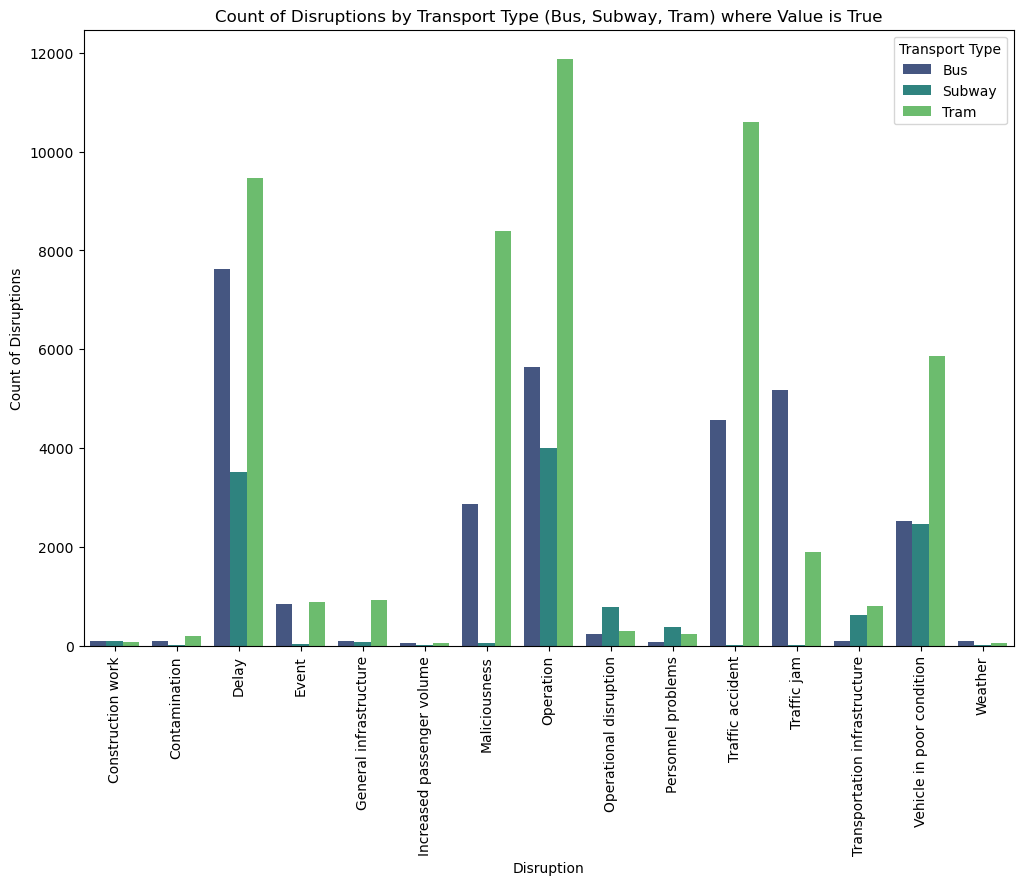

In [9]:
data_true = data_processed[(data_processed['bus'] == True) | (data_processed['subway'] == True) | (data_processed['tram'] == True)]

bus_counts = data_true[data_true['bus'] == True].groupby('disruption').size().reset_index(name='Count')
subway_counts = data_true[data_true['subway'] == True].groupby('disruption').size().reset_index(name='Count')
tram_counts = data_true[data_true['tram'] == True].groupby('disruption').size().reset_index(name='Count')

bus_counts['Transport'] = 'Bus'
subway_counts['Transport'] = 'Subway'
tram_counts['Transport'] = 'Tram'

combined_counts = pd.concat([bus_counts, subway_counts, tram_counts], ignore_index=True)

plt.figure(figsize=(12, 8))
sns.barplot(data=combined_counts, x='disruption', y='Count', hue='Transport', palette='viridis')

plt.xlabel('Disruption')
plt.ylabel('Count of Disruptions')
plt.title('Count of Disruptions by Transport Type (Bus, Subway, Tram) where Value is True')
plt.xticks(rotation=90)
plt.legend(title='Transport Type')
plt.show()

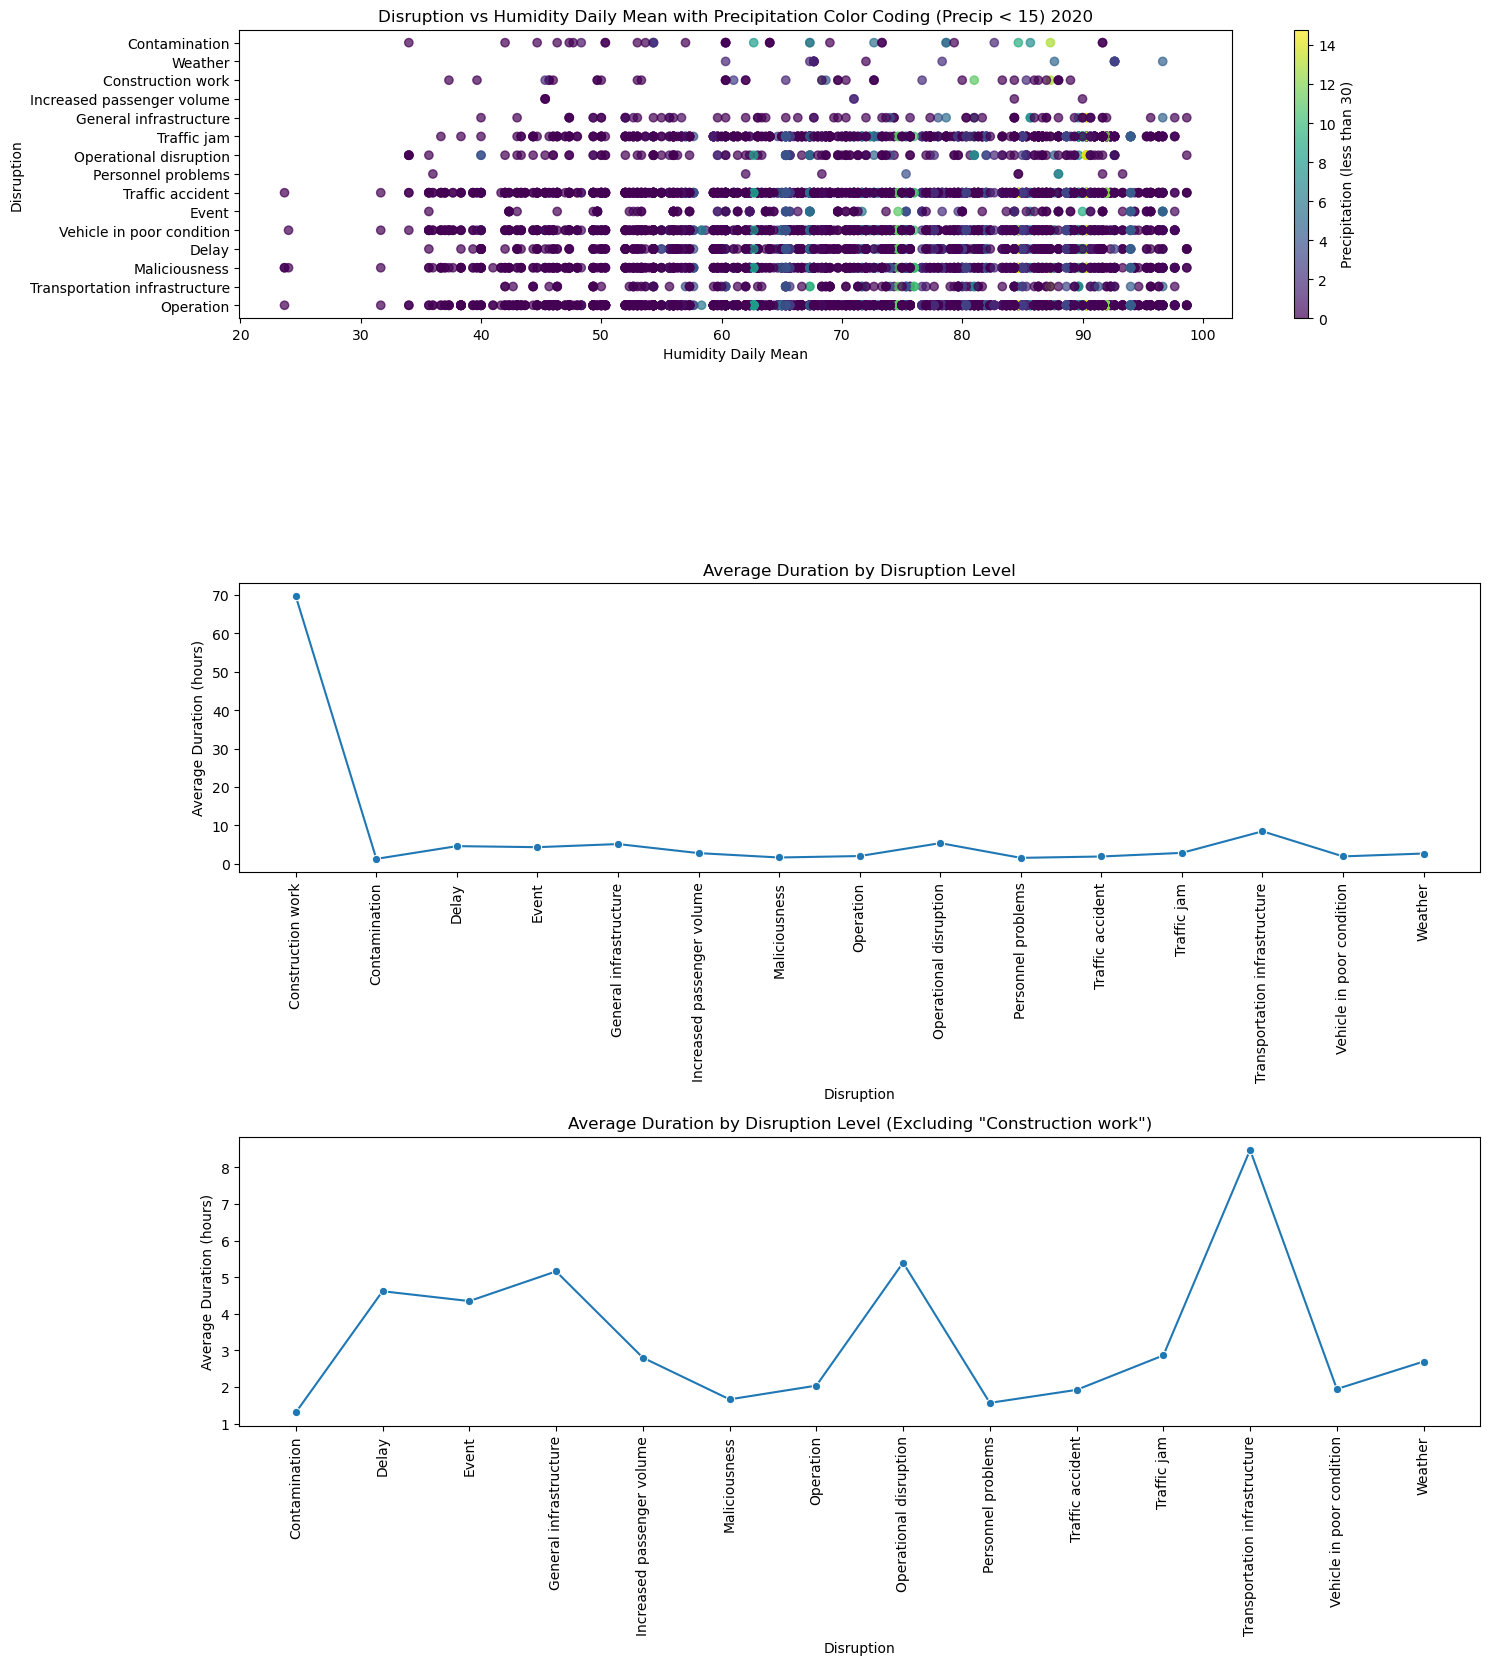

In [10]:
plt.figure(figsize=(15,20))

data_processed['duration_hours'] = data_processed['duration'].dt.total_seconds() / 3600
avg_duration = data_processed.groupby('disruption')['duration_hours'].mean().reset_index()
filtered_data = data_processed[data_processed['precip'] < 15]
filtered_data = filtered_data[filtered_data.index.get_level_values(0) == 2020]

plt.subplot(4,1,1)
plt.subplot(4, 1, 1)  
scatter = plt.scatter(filtered_data['hum_dailyMean'], filtered_data['disruption'], 
                      c=filtered_data['precip'], cmap='viridis', alpha=0.7)
cbar = plt.colorbar(scatter)
cbar.set_label('Precipitation (less than 30)')  
plt.xlabel('Humidity Daily Mean')
plt.ylabel('Disruption')
plt.title('Disruption vs Humidity Daily Mean with Precipitation Color Coding (Precip < 15) 2020')

plt.subplot(4, 1, 2)
sns.lineplot(x='disruption', y='duration_hours', data=avg_duration, marker='o')
plt.xticks(rotation=90)
plt.xlabel('Disruption')
plt.ylabel('Average Duration (hours)')
plt.title('Average Duration by Disruption Level')

plt.subplot(4, 1, 3)
avg_duration_no_construction = avg_duration[avg_duration['disruption'] != 'Construction work']
sns.lineplot(x='disruption', y='duration_hours', data=avg_duration_no_construction, marker='o')
plt.xticks(rotation=90)
plt.xlabel('Disruption')
plt.ylabel('Average Duration (hours)')
plt.title('Average Duration by Disruption Level (Excluding "Construction work")')

plt.tight_layout()
plt.show()

In [11]:
# hidden tests, DO NOT MODIFY OR COPY THIS CELL!!

# Classification models

## Task 7: Model for disruption class prediction (25 Points)

Build and train a model using weather and traffic data from 2013 until 2023 (incl.) using `scikit-learn`.

You have to do the following steps:

1. Create train, validation, and test splits - **2**
1. First ML experiments - **2**
1. Explore the different metrics - **3**
1. Explore different scaling approaches - **3**
1. Experiment with different train/valid splits - **3**
1. Experiment with different feature selection methods - **3**
1. Try out different ML algorithms - **3**
1. Explore the effect of parameters with 10-fold cross-validation - **3**
1. Present your best performing results - **3**

General advices: Make sure your results are reproducible. You can use your student ID as seed.

### 7.1 Create train, validation, and test splits

First, we need to create a dataset that will be used to train a model. 

Due to performance reasons we only use a fraction of the overall data set for our computations.

In [12]:
def sample_data(df: pd.DataFrame, fraction: float = 0.7) -> pd.DataFrame:
    data_shortened = df.copy()
    columns_to_drop = [
    'temp_dailyMin',
    'temp_dailyMax',
    'hum_dailyMin',
    'hum_dailyMax',
    'wind_dailyMin',
    'wind_dailyMax',
    'temp_dailyMedian',
    'precip'
    ]
    data_shortened.drop(columns=columns_to_drop, inplace=True)
    
    # we drop disruption since it is mapped to our new target variable 'class'
    data_shortened = data_shortened.drop(columns=['disruption']) 
    # Convert entries in the `duration` column from `Timedelta` to floating-point number `numpy.float64`, so that this column can be also used as a feature to train a classifier:
    data_shortened['duration'] = (data_shortened['duration'] - data_shortened['duration'].min())  / np.timedelta64(1,'D')
    return data_shortened

data_shortened = sample_data(data_processed)
data_shortened.head()

temp_dailyMean  hum_dailyMean  wind_dailyMean    bus  subway  \
year month day                                                                 
2013 9     14             16.0      76.333333        3.666667   True   False   
           14             16.0      76.333333        3.666667  False   False   
           14             16.0      76.333333        3.666667  False   False   
           14             16.0      76.333333        3.666667  False   False   
           14             16.0      76.333333        3.666667  False   False   

                 tram  duration          class  duration_hours  
year month day                                                  
2013 9     14   False  0.065972      Operation        1.583333  
           14    True  0.129167  Maliciousness        3.100000  
           14    True  0.032639  Maliciousness        0.783333  
           14    True  0.097917          Delay        2.350000  
           14    True  0.034028  Maliciousness        0.816667

In [13]:
# hidden tests, DO NOT MODIFY OR COPY THIS CELL!!


Split the `data_shortened` DataFrame into train (this will be further split to train and validation) and test sets.
- Train & validation set: 80% of the overall data set
- Test set: remaining 20% of the data

In [14]:
from sklearn.model_selection import train_test_split

def split_data(df: pd.DataFrame, test_size: float=0.2, target_column: str = 'class') -> typing.Tuple[pd.DataFrame, pd.DataFrame]:

    df_train, df_test = train_test_split(df, test_size=test_size, random_state=202410, shuffle=True)
    df_train = df_train.sort_index()
    df_test = df_test.sort_index()
        
    return df_train, df_test

In [15]:
data_train, data_test = split_data(data_shortened)

In [16]:
assert data_train.shape[1] == data_test.shape[1], "Both dataframes should have the same number of columns!!"
assert data_train.shape[1] == data_shortened.shape[1], "All columns should be retained!!"
assert data_train.shape[0] < data_shortened.shape[0], "data_train should be a subset of data_shortened, so it should have less rows!"
assert data_test.shape[0] < data_shortened.shape[0], "data_test should be a subset of data_shortened, so it should have less rows!"

In [17]:
# hidden tests, DO NOT MODIFY OR COPY THIS CELL!!


In order to train and validate a machine learning model, we need a set of training samples, and some validation data.
We want to treat our test dataset as "hidden test data", so we do not want to touch it in the experiments to choose and optimize our ML model. Instead we split off another small validation set from our training data.
* Split the `data_train` into train and validation sets. 
* Separate the features from the target attribute to predict (type of disruption: `class`). `X_` valiables should contain features whily `y_` variables contain the target values.

Reminder: Do not use imports other than those from Python's standard library, pandas, numpy, scipy, matplotlib, seaborn and scikit-learn.


In [18]:
def create_dataset(df:pd.DataFrame, valid_size:float, random_state) -> typing.Tuple[pd.DataFrame, pd.Series, pd.DataFrame, pd.Series]:
    X_train, X_valid = train_test_split(df, test_size=valid_size, random_state=random_state) 
    y_train, y_valid = X_train['class'], X_valid['class'] 
    X_train = X_train.drop(columns=['class', 'duration_hours']) 
    X_valid = X_valid.drop(columns=['class', 'duration_hours'])
    
    return X_train, y_train, X_valid, y_valid

In [19]:
valid_split = 0.2
X_train, y_train, X_valid, y_valid = create_dataset(data_train, valid_size=valid_split, random_state=student_id)

In [20]:
X_train

,,,temp_dailyMean,hum_dailyMean,wind_dailyMean,bus,subway,tram,duration
year,month,day,,,,,,,
2019,7,11,22.033333,39.666667,2.000000,False,False,True,0.057639
2023,4,25,11.333333,63.000000,3.333333,True,False,False,0.050694
2020,3,4,6.733333,62.000000,2.666667,False,False,True,0.070139
2013,11,19,7.066667,88.333333,3.333333,True,False,False,0.172917
2023,3,21,13.333333,58.666667,2.333333,False,False,True,0.038194
...,...,...,...,...,...,...,...,...,...
2021,9,19,14.800000,66.000000,2.000000,False,False,True,0.050000
2020,10,17,8.983333,80.000000,2.666667,False,False,False,0.059028
2019,8,7,27.100000,53.000000,2.000000,False,False,True,0.088889


In [21]:
# Tests
assert isinstance(X_train, pd.DataFrame)
assert isinstance(X_valid, pd.DataFrame)

assert isinstance(y_train, pd.Series)
assert isinstance(y_valid, pd.Series)

assert X_train.shape[0] <= data_train.shape[0] * (1 - valid_split+0.05), "Number of rows should match the valid_split size (plus a small tolerance)!"
assert X_valid.shape[0] <= data_train.shape[0] * (valid_split+0.05), "Number of rows should match the valid_split size (plus a small tolerance)!"

assert y_train.shape[0] == X_train.shape[0], "Number of rows should stay the same for x and y!"
assert y_valid.shape[0] == X_valid.shape[0], "Number of rows should stay the same for x and y!"

assert len(y_train.shape) == 1
assert len(y_valid.shape) == 1

In [22]:
# hidden tests, DO NOT MODIFY OR COPY THIS CELL!!


### 7.2 First ML experiments

#### Identify suitable ML methods

Now that we have training and validation data, select an appropriate ML method and train it using the data.
It might help to go back to the visualization task and think about what kind of data we are dealing with, and what the task of the model should be.

- Identify **at least three** (see https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html) suitable ML methods from sklearn and add them to the list in the code block below.

In [23]:
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import HistGradientBoostingClassifier

suitable_ml_methods = []

# add at least three suitable methods:

suitable_ml_methods.append(type(SGDClassifier()))
suitable_ml_methods.append(type(RandomForestClassifier(n_estimators=100, random_state=42)))
suitable_ml_methods.append(type(HistGradientBoostingClassifier(max_iter=100)))

In [24]:
def print_selection(selected: list, sel_type:str='methods'):
  print(f"Identified {sel_type}:\n===================\n"+ 
        '\n'.join([cur_sel.__name__ for cur_sel in selected]))

In [25]:
print_selection(suitable_ml_methods)

Identified methods:
SGDClassifier
RandomForestClassifier
HistGradientBoostingClassifier


In [26]:
# Tests

assert len(suitable_ml_methods) >= 3

assert np.all([cur_method.__module__.startswith('sklearn')  \
          for cur_method in suitable_ml_methods]), \
          "Only use classes from sklearn!"

In [27]:
# hidden tests, DO NOT MODIFY OR COPY THIS CELL!!


#### Train a ML model

Now that we have identified suitable methods, let's train a model! Implement two functions:
- Train a ML method on the train subset (`X_train`, `y_train`) and return the trained model.
- Use the trained model to predict the validation subset (`X_valid`) and return the predictions.
- Your trained model should be better than our hidden baseline model (don't worry, it's not a strong one!)

In [88]:
def train_model(model_type: type, X_train:pd.DataFrame, y_train:pd.DataFrame) -> sklearn.base.ClassifierMixin:
        
    if model_type == sklearn.linear_model.SGDClassifier:
        trained_model = model_type(loss='hinge', max_iter=1000, tol=1e-3, random_state=42)
    elif model_type == sklearn.svm.SVC:
        trained_model = model_type(kernel='linear', random_state=42)
    elif model_type == sklearn.ensemble.RandomForestClassifier:
        trained_model = model_type(n_estimators=100, random_state=42)
    else:
        trained_model = model_type()
    trained_model.fit(X_train, y_train)
    
    return trained_model

def predict_disruption_type(trained_model: sklearn.base.ClassifierMixin, X_valid:pd.DataFrame) -> np.ndarray:
    y_pred = None  # numpy.ndarray
    y_pred = trained_model.predict(X_valid)
    return y_pred

In [89]:
model_idx = 0  # you can choose different models from the list of suitable models here
choosen_model_class = suitable_ml_methods[model_idx]
print(f"Choosen model: {choosen_model_class.__name__}")

Choosen model: SGDClassifier


In [90]:
trained_model = train_model(choosen_model_class, X_train, y_train)
y_pred = predict_disruption_type(trained_model, X_valid)

In [91]:
print(np.unique(y_pred))

['Construction work' 'Delay' 'Event' 'Operation' 'Operational disruption'
 'Traffic accident' 'Transportation infrastructure'
 'Vehicle in poor condition']


In [92]:
assert y_pred.shape[0] == y_valid.shape[0], "Predictions for each row!"
assert len(y_pred.shape) == 1, 'only one value per row!'

In [93]:
# hidden tests, DO NOT MODIFY OR COPY THIS CELL!!


### 7.3 Explore different metrics

In order to quantify the quality of the trained model we need a metric to  calculate performance.
Similarly as above with the ML methods, please identify at least three metrics from `sklearn.metrics` that are suitable for the task at hand.
Add them to the list below:

In [94]:
suitable_metrics = []

suitable_metrics.append(sklearn.metrics.accuracy_score)
suitable_metrics.append(sklearn.metrics.precision_score)
suitable_metrics.append(sklearn.metrics.recall_score)

In [95]:
print_selection(suitable_metrics, 'metrics')

Identified metrics:
accuracy_score
precision_score
recall_score


In [96]:
# Tests

assert len(suitable_metrics) >= 3

assert np.all([cur_metric.__module__.startswith('sklearn')  \
          for cur_metric in suitable_metrics]), \
          "Only use classes from sklearn!"

assert np.all([callable(cur_metric) \
        for cur_metric in suitable_metrics]), \
        "Metrics must be functions"

In [97]:
# hidden tests, DO NOT MODIFY OR COPY THIS CELL!!


Now calculate the metrics for the given validation data.
- Use the predictions from the previous experiment and calculate the values of the different metrics in `suitable_metrics`.  
- Return these scores as a dictionary with metric names as keys and the performance values as values. 

In [98]:
def compare_metrics(y_true:pd.DataFrame, y_pred:pd.DataFrame) -> dict:
  scores = {} # dict of metric name -> metric value/score
  for metric in suitable_metrics:
    if metric is sklearn.metrics.accuracy_score:
        scores[metric.__name__] = metric(y_true, y_pred)
    else:
        scores[metric.__name__] = metric(y_true, y_pred, average='weighted', zero_division=0)    
  return scores

In [99]:
def print_scores(scores: dict):
  print("\nScores:\n=======")
  for metric_name, metric_value in scores.items():
    print(f"{metric_name}: {metric_value}")

In [100]:
metrics_scores = compare_metrics(y_valid, y_pred)
print_scores(metrics_scores)


Scores:
accuracy_score: 0.2517662594915814
precision_score: 0.23491764538390894
recall_score: 0.2517662594915814


In [101]:
# hidden tests, DO NOT MODIFY OR COPY THIS CELL!!


### 7.4 Explore different scaling approaches
For some machine learning methods, the value range of the feature data can have a huge impact. Usually, it is best to normalize the value ranges of the individual features. In sklearn this is achieved using so-called scalers.

- Use one ML method from your selection, for which a feature normalization would make a difference (you can try out different ones and also go back and add one if necessary). 
- Try and compare three different scaling methods.
- Compare the scores and check if it makes a difference.

In [102]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

def fit_pipeline(X_train:pd.DataFrame, 
                    y_train:pd.DataFrame, 
                    X_valid:pd.DataFrame, 
                    y_valid:pd.DataFrame, 
                    model_class: type, 
                    scaler_class:type, 
                    metric_func:type):
  # build a sklearn pipeline using the scaler and the model 
  # train the pipeline, and predict on the valid data
  # calculate the performance using the metric_func on the predictions and y_valid
  # return the calculated performance
  score = 0.0
  pipeline = make_pipeline(scaler_class(), model_class())
  pipeline.fit(X_train, y_train)
  y_pred = pipeline.predict(X_valid)
  score = metric_func(y_valid, y_pred)  
  return score


def compare_scaling(X_train:pd.DataFrame, 
                    y_train:pd.DataFrame, 
                    X_valid:pd.DataFrame, 
                    y_valid:pd.DataFrame, 
                    model_class: type, 
                    metric_func: type):
    scores = {}

    scores['StandardScaler'] = fit_pipeline(X_train, y_train, X_valid, y_valid, model_class, StandardScaler, metric_func)
    scores['MinMaxScaler'] = fit_pipeline(X_train, y_train, X_valid, y_valid, model_class, MinMaxScaler, metric_func)
    scores['RobustScaler'] = fit_pipeline(X_train, y_train, X_valid, y_valid, model_class, RobustScaler, metric_func)
    return scores

In [103]:
model_idx = 0 
metric_idx = 0

choosen_model_class = suitable_ml_methods[model_idx]
choosen_metric_func = suitable_metrics[metric_idx]
print(f"Choosen model: {choosen_model_class.__name__}")
print(f"Choosen metric: {choosen_metric_func.__name__}")

Choosen model: SGDClassifier
Choosen metric: accuracy_score


In [104]:
scaling_scores = compare_scaling(X_train, y_train, X_valid, y_valid, 
                                 choosen_model_class, choosen_metric_func)
print_scores(scaling_scores)


Scores:
StandardScaler: 0.1811158798283262
MinMaxScaler: 0.20528227137669197
RobustScaler: 0.2837900297127765


In [105]:
# hidden tests, DO NOT MODIFY OR COPY THIS CELL!!


In [106]:
model_idx = 1 
metric_idx = 0

choosen_model_class = suitable_ml_methods[model_idx]

choosen_metric_func = suitable_metrics[metric_idx]
print(f"Choosen model: {choosen_model_class.__name__}")
print(f"Choosen metric: {choosen_metric_func.__name__}")

Choosen model: RandomForestClassifier
Choosen metric: accuracy_score


In [107]:
scaling_scores = compare_scaling(X_train, y_train, X_valid, y_valid, 
                                 choosen_model_class, choosen_metric_func)
print_scores(scaling_scores)


Scores:
StandardScaler: 0.3396500495212942
MinMaxScaler: 0.33839551006932983
RobustScaler: 0.34255529877847474


In [108]:
model_idx = 2 
metric_idx = 0

choosen_model_class = suitable_ml_methods[model_idx]

choosen_metric_func = suitable_metrics[metric_idx]
print(f"Choosen model: {choosen_model_class.__name__}")
print(f"Choosen metric: {choosen_metric_func.__name__}")

Choosen model: HistGradientBoostingClassifier
Choosen metric: accuracy_score


In [109]:
scaling_scores = compare_scaling(X_train, y_train, X_valid, y_valid, 
                                 choosen_model_class, choosen_metric_func)
print_scores(scaling_scores)


Scores:
StandardScaler: 0.33905579399141633
MinMaxScaler: 0.3289534499834929
RobustScaler: 0.33516011885110597


In [110]:
# hidden tests, DO NOT MODIFY OR COPY THIS CELL!!


### 7.5 Experiment with different train/valid splits

Try out **at least 4 different train-valid splits**. 
- Use the `data_train` DataFrame as input.
- Use splits other than those in Section 7.1.
- Choose one ML algorithm (e.g. from Section 7.1) and one metric from Section 7.3.
- Evaluate the performance of the different splits.
- Return these scores as a dict with a name of the train-valid split as keys and the score as values.

Hint: you can re-use the `create_dataset` function from Section 7.1.

In [111]:
import random
def compare_train_valid_splits(df:pd.DataFrame) -> typing.Dict[str, float]:
    scores = {}
    split_size = [0.1,0.3,0.5,0.7]
    for i in split_size:
        X_train, X_valid = train_test_split(df, test_size=i, random_state=student_id) 
        y_train, y_valid = X_train['class'], X_valid['class'] 
        X_train = X_train.drop(columns=['class', 'duration_hours']) 
        X_valid = X_valid.drop(columns=['class', 'duration_hours'])
        scores[f'Split size {i}'] = fit_pipeline(X_train, y_train, X_valid, y_valid, suitable_ml_methods[0], StandardScaler, suitable_metrics[0])
    return scores

In [112]:
split_scores = compare_train_valid_splits(data_train)

print_scores(split_scores)


Scores:
Split size 0.1: 0.24019543113693384
Split size 0.3: 0.20199841535346422
Split size 0.5: 0.19232496104376304
Split size 0.7: 0.28878659824932085


In [113]:
# hidden tests, DO NOT MODIFY OR COPY THIS CELL!!


### 7.6 Experiment with different feature selection methods

- Explore **at least 2 different feature selection methods** from `sklearn.feature_selection` and evaluate a baseline ML setup (e.g. the same setup as in Section 7.5). 
- Use the original train-valid split from Section 7.2.
- Return the scores as a dict with the features selections name as string keys and the scores as values.

In [114]:
from sklearn.feature_selection import VarianceThreshold, SelectPercentile, f_classif

def evaluate_model(X_train, X_valid, y_train, y_valid, feature_selector, model):
    X_train_selected = feature_selector.fit_transform(X_train, y_train)
    X_valid_selected = feature_selector.transform(X_valid)
    model.fit(X_train_selected, y_train)
    return suitable_metrics[0](y_valid, model.predict(X_valid_selected))

def compare_feature_selection(X_train:pd.DataFrame, 
                              X_valid:pd.DataFrame, 
                              y_train:pd.DataFrame, 
                              y_valid:pd.DataFrame) -> typing.Dict[str, float]:
  scores = {}
  selector_variance = VarianceThreshold()
  scores['VarianceThreshold'] = evaluate_model(X_train, X_valid, y_train, y_valid, selector_variance, suitable_ml_methods[0]())
  selector_percentile = SelectPercentile(f_classif, percentile=10)
  scores['SelectPercentile'] = evaluate_model(X_train, X_valid, y_train, y_valid, selector_percentile, suitable_ml_methods[0]())
  return scores

In [115]:
feat_sel_scores = compare_feature_selection(X_train, X_valid, y_train, y_valid)

print_scores(feat_sel_scores)


Scores:
VarianceThreshold: 0.23261802575107296
SelectPercentile: 0.18494552657642788


In [116]:
# hidden tests, DO NOT MODIFY OR COPY THIS CELL!!


### 7.7 Try out different ML algorithms

- Try out **at least 3 ML methods**.
- Use the original train-valid split from Section 7.2.
- If your chosen algorithm has specific parameters, explore their effect by using 10-fold cross-validation.
- Evaluate the performance of the different methods.
- Return these scores as a list.

In [117]:
def compare_methods(X_train:pd.DataFrame, X_valid:pd.DataFrame, 
                    y_train:pd.DataFrame, y_valid:pd.DataFrame) -> typing.Dict[str, float]:
  scores = {}
  for model in suitable_ml_methods:
    trained_model = train_model(model, X_train, y_train)
    y_pred = predict_disruption_type(trained_model, X_valid)
    scores[model.__name__] = compare_metrics(y_valid, y_pred)[choosen_metric_func.__name__]
  return scores

In [118]:
diff_methods_scores = compare_methods(X_train, X_valid, y_train, y_valid)

print_scores(diff_methods_scores)


Scores:
SGDClassifier: 0.2517662594915814
RandomForestClassifier: 0.3411687025420931
HistGradientBoostingClassifier: 0.3406404754044239


In [119]:
# hidden tests, DO NOT MODIFY OR COPY THIS CELL!!


### 7.8 Explore the effect of parameters with 10-fold cross-validation

- Choose an algorithm from Section 7.7 that has specific parameters. 
- Explore the effect of these parameters by using 10-fold cross-validation.
- Use the whole `data_train` DataFrame.
- Do this for at least 3 different parameters.
- For each parameter try 2-3 different values.
- Evaluate the performance of the different settings by comparing the mean scores.
- Return these scores as a list.

In [ ]:
def compare_param_effect(df:pd.DataFrame) -> typing.Dict[str, float]:
    scores = {}
    # YOUR CODE HERE
    raise NotImplementedError()
    return scores

In [ ]:
param_effect_scores = compare_param_effect(data_train)

print_scores(param_effect_scores)

In [ ]:
assert len(param_effect_scores) >= 3

In [ ]:
# hidden tests, DO NOT MODIFY OR COPY THIS CELL!!


### 7.9 Present your best-performing training results

- Look back to all the experiments above and figure it out which setup has the best performance.
- Visualize how the predictions differ from the ground truth.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [ ]:
# best configuration

valid_split = 0.2
param = "gini" 
model = RandomForestClassifier(random_state=student_id, criterion=param) # KNN was also good but more computationally expensive
scaler = StandardScaler()
method = accuracy_score
features = ['temp_dailyMean', 'hum_dailyMin', 'hum_dailyMax', 'hum_dailyMean', 'bus', 'subway', 'tram']
X = data_train[features]
y = data_train["class"]

def extract_val_data(X, y, valid_split, random_state):
    # extract validation data

    # YOUR CODE HERE
    raise NotImplementedError()

    return X_train, y_train, X_valid, y_valid


# predictions
def fit(scaler, model, method, X, y, valid_split, random_state):

    # YOUR CODE HERE
    raise NotImplementedError()
    
    return y_pred
    

y_pred = fit(scaler, model, method, X, y, valid_split, 42)
y_true = y_valid.values

In [ ]:
y_pred = label_encoder.inverse_transform(y_pred)
y_true = label_encoder.inverse_transform(y_true)

In [ ]:
# hidden tests, DO NOT MODIFY OR COPY THIS CELL!!


In [ ]:
from sklearn.metrics import classification_report  

# Generate the classification report with disruption names
# YOUR CODE HERE
raise NotImplementedError()

print(report)

In [ ]:
from sklearn.metrics import multilabel_confusion_matrix

# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
labels = data_processed['disruption'].unique()

# Plot the confusion matrix that was generated in the cell before in a nice format. Each class should have its own representation.

def plot_confusion_matrix(cm, class_name):
    
    # YOUR CODE HERE
    raise NotImplementedError()

for class_name in labels:
    class_index = data_processed[data_processed['disruption'] == class_name]['class'].iloc[0]
    class_cm = cm[class_index, :, :]
    plot_confusion_matrix(class_cm, class_name)

## Task 8: Test model on unknown data (5 Points)

Use the test data created in Section 7.1 and predict traffic disruptions for this data using the best model you found on the training data.

In [ ]:
data_test.info()

In [ ]:
disruption_types = data_processed['class'].unique()
disruption_types

### 8.1 Train & predict with best model

Set your best model

In [ ]:
best_model = None
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
assert isinstance(best_model, sklearn.pipeline.Pipeline) or isinstance(best_model,tuple(all_methods))

In [ ]:
def train_and_predict(best_model, train_data: pd.DataFrame, test_data: pd.DataFrame):
  predictions = None
  #probabilities = None
  # YOUR CODE HERE
  raise NotImplementedError()
  return predictions #, probabilities

In [ ]:
# train with train data, predict on hidden test data. For hidden test data, we do not provide the weekly_infections values, of course!
unknown_prediction = train_and_predict(best_model, data_train, data_test.drop('class', axis=1)) 

In [ ]:
# hidden tests, DO NOT MODIFY OR COPY THIS CELL!!

In [ ]:
disruption_preds = np.unique(unknown_prediction)
disruption_preds

In [ ]:
assert len(unknown_prediction.shape) == 1, "Predictions should only have 1 column!"
assert unknown_prediction.shape[0] == data_test.shape[0], "Predictions should have the same number of columns as test data!"

In [ ]:
# hidden tests, DO NOT MODIFY OR COPY THIS CELL!!



### 8.2 Visualize Results

* Present the model performance on the test dataset by using one or more metrics from Section 7.3. 
* Use two meaningful representations for the results, e.g. classification report and confusion matrix.

In [ ]:
# First plot
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
# Second plot
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
# hidden tests, DO NOT MODIFY OR COPY THIS CELL!!